In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

input_file = "CSV/BLS_jobs_data_cleaned.csv"

In [2]:
df = pd.read_csv(input_file)
display(df)
df.dtypes

,URL,Typical Entry-Level Education,Work Experience in a Related Occupation,On-the-job Training,"Number of Jobs, 2019","Employment Change, 2019-29",Job_Title,Yearly_Wage,Hourly_Wage,Job_Outlook_2019-29_Rate,Job_Outlook_2019-29_Discription
0,https://www.bls.gov/ooh/arts-and-design/craft-...,See How to Become One,None,Long-term on-the-job training,51900,100,Portrait artists,48760.0,23.44,0.00,Little or no change
1,https://www.bls.gov/ooh/management/human-resou...,Bachelor's degree,5 years or more,None,165200,10400,Personnel directors,116720.0,56.11,0.06,Faster than average
2,https://www.bls.gov/ooh/management/farmers-ran...,High school diploma or equivalent,5 years or more,None,952300,-61600,Nursery managers,71160.0,34.21,-0.06,Decline
3,https://www.bls.gov/ooh/management/postseconda...,Master's degree,Less than 5 years,None,190500,7100,College registrars,95410.0,45.87,0.04,As fast as average
4,https://www.bls.gov/ooh/construction-and-extra...,See How to Become One,None,Short-term on-the-job training,1643900,81000,Building carpenter helpers,36000.0,17.31,0.05,Faster than average
...,...,...,...,...,...,...,...,...,...,...,...
2388,https://www.bls.gov/ooh/office-and-administrat...,See How to Become One,None,See How to Become One,1465800,-38000,Resort desk clerks,35390.0,17.01,-0.03,Decline
2389,https://www.bls.gov/ooh/office-and-administrat...,High school diploma or equivalent,None,See How to Become One,1343400,3500,Human resources administrative assistants,40540.0,19.49,0.00,Little or no change
2390,https://www.bls.gov/ooh/production/assemblers-...,High school diploma or equivalent,None,Moderate-term on-the-job training,1883700,-204300,Team assembly line machine operators,33710.0,16.21,-0.11,Decline
2391,https://www.bls.gov/ooh/construction-and-extra...,See How to Become One,None,See How to Become One,302100,-10000,Onyx-chip terrazzo workers,46500.0,22.35,-0.03,Decline


URL                                         object
Typical Entry-Level Education               object
Work Experience in a Related Occupation     object
On-the-job Training                         object
Number of Jobs, 2019                         int64
Employment Change, 2019-29                   int64
Job_Title                                   object
Yearly_Wage                                float64
Hourly_Wage                                float64
Job_Outlook_2019-29_Rate                   float64
Job_Outlook_2019-29_Discription             object
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb640f9a430>,
      dtype=object)

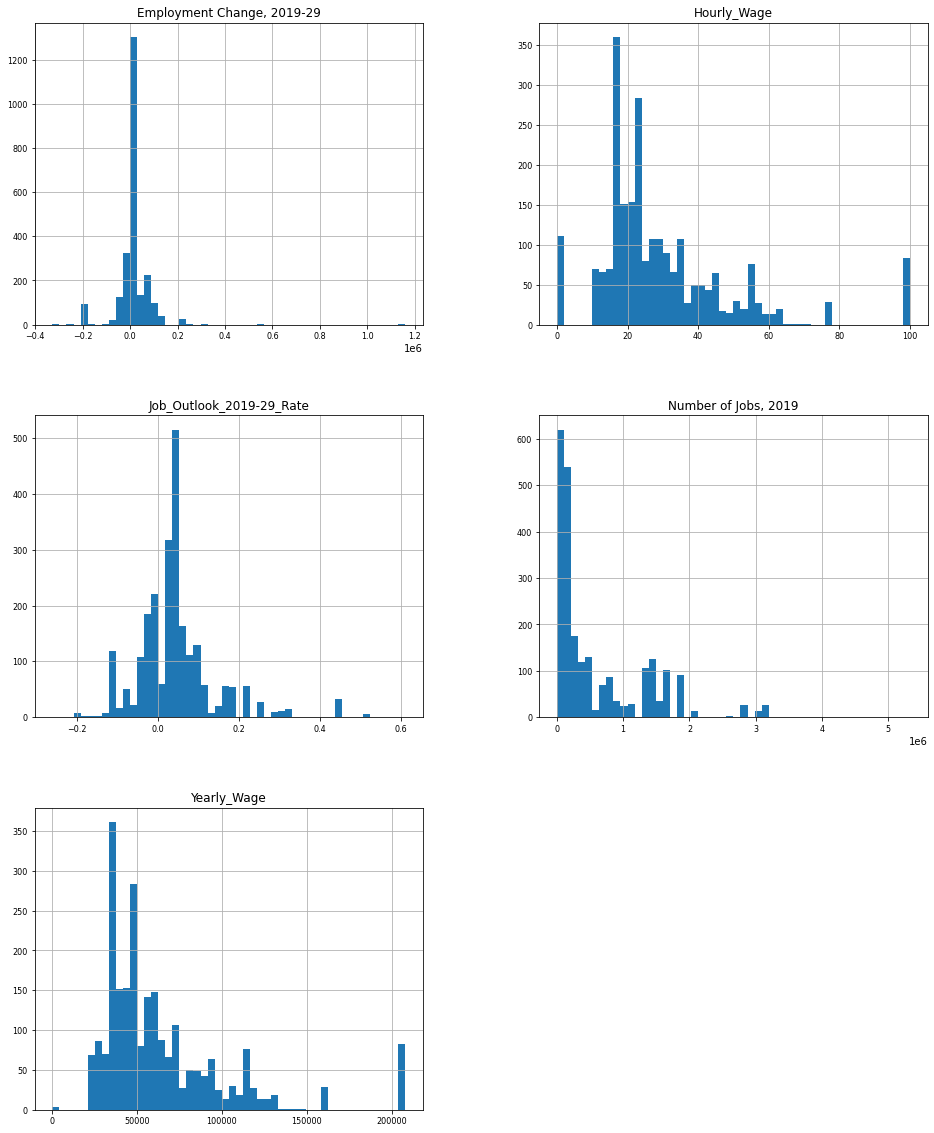

In [3]:
numerical_columns = df.select_dtypes(["int64", "float64"]).columns
df[numerical_columns].hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8)

# Summary Statistics

In [4]:
net_jobs_growth = 0

req_ed = list(set( df["Typical Entry-Level Education"].tolist() ))
req_ed = ['No formal educational credential', 'High school diploma or equivalent', 'See How to Become One',
          'Some college, no degree',"Associate's degree", "Bachelor's degree", 
          'Postsecondary nondegree award', "Master's degree", 'Doctoral or professional degree']
for r in req_ed:
    mean = df["Yearly_Wage"].loc[df["Typical Entry-Level Education"]==r].mean(axis=0)
    std = df["Yearly_Wage"].loc[df["Typical Entry-Level Education"]==r].std(axis=0)
    num_jobs = df["Number of Jobs, 2019"].loc[df["Typical Entry-Level Education"]==r].sum(axis=0)
    pred_change = df["Employment Change, 2019-29"].loc[df["Typical Entry-Level Education"]==r].sum(axis=0)
    
    print("{:=^100}".format(r))
    print("Mean Yearly Wage:\t\t{:,}".format(round(mean, 2)))
    print("Std Dev Yearly Wage:\t\t{:,}".format(round(std, 2)))
    print("Number of Jobs Avail.:\t\t{:,}".format(round(num_jobs, 2)))
    print("Predicted Change in Avail.:\t{:,}".format(round(pred_change, 2)))
    
    net_jobs_growth += pred_change
    
print("\nIn 2029, BLS predicts {:,} more jobs in the US.".format(net_jobs_growth))

==================================No formal educational credential==================================
Mean Yearly Wage:		40,803.1
Std Dev Yearly Wage:		7,520.63
Number of Jobs Avail.:		39,416,700
Predicted Change in Avail.:	828,100
=================================High school diploma or equivalent==================================
Mean Yearly Wage:		41,336.83
Std Dev Yearly Wage:		13,647.97
Number of Jobs Avail.:		525,626,500
Predicted Change in Avail.:	-11,481,100
=======================================See How to Become One========================================
Mean Yearly Wage:		41,729.43
Std Dev Yearly Wage:		9,109.46
Number of Jobs Avail.:		356,587,600
Predicted Change in Avail.:	8,325,400
======================================Some college, no degree=======================================
Mean Yearly Wage:		27,190.52
Std Dev Yearly Wage:		7,052.06
Number of Jobs Avail.:		26,869,900
Predicted Change in Avail.:	815,700
=========================================Associate's degree=====

# Show Bottom 20 Jobs based on Predicted Change in Availability

In [5]:
for r in req_ed:
    print("{:=^100}".format(r))
    df_temp = df.loc[df["Typical Entry-Level Education"]==r]
    df_temp = df_temp.sort_values(by=["Employment Change, 2019-29"], ascending=True)
    display( df_temp[["Job_Title", "Yearly_Wage", "Number of Jobs, 2019", "Employment Change, 2019-29"]].head(20) )

==================================No formal educational credential==================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
2169,Cashiers,23650.0,3600900,-265300
1093,Retail sales workers,25440.0,4633100,-19700
156,Food preparation workers,24800.0,886700,-9500
544,Fishing and hunting workers,28530.0,36700,-2800
811,Sheet rock hangers,47360.0,146900,-300
656,Sheet rock appliers,47360.0,146900,-300
632,Drywall tapers,47360.0,146900,-300
920,Sheet rock workers,47360.0,146900,-300
2308,Framers,47360.0,146900,-300
1234,Sheet rock tapers,47360.0,146900,-300


=================================High school diploma or equivalent==================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
1859,Secretaries and administrative assistants,39850.0,3638800,-327400
2390,Team assembly line machine operators,33710.0,1883700,-204300
889,Steam turbine assemblers,33710.0,1883700,-204300
331,Electromechanical equipment assemblers,33710.0,1883700,-204300
952,Fiberglass machine operators,33710.0,1883700,-204300
955,"Coil winders, tapers, and finishers",33710.0,1883700,-204300
998,Motor rewinders,33710.0,1883700,-204300
1017,Electronic sensing equipment assemblers,33710.0,1883700,-204300
1039,Electrical and electronic equipment assemblers,33710.0,1883700,-204300
1048,Aircraft sheet metal mechanics,33710.0,1883700,-204300


=======================================See How to Become One========================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
1150,Metal and plastic machine workers,36990.0,1109400,-75800
1773,Customer service correspondence clerks,35390.0,1465800,-38000
1884,File clerks,35390.0,1465800,-38000
1895,Outpatient interviewing clerks,35390.0,1465800,-38000
361,File keepers,35390.0,1465800,-38000
358,Assistant innkeepers,35390.0,1465800,-38000
670,Motor vehicle representatives,35390.0,1465800,-38000
1301,Order desk clerks,35390.0,1465800,-38000
1289,Correspondence clerks,35390.0,1465800,-38000
693,Correspondence transcribers,35390.0,1465800,-38000


======================================Some college, no degree=======================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
2262,"Bookkeeping, accounting, and auditing clerks",41230.00,1673600,-95400
1514,Actors,20.43,70100,2100
11,Instructional aides,27920.00,1395900,50500
2145,Paraeducators,27920.00,1395900,50500
1932,Special education instructional assistants,27920.00,1395900,50500
1892,Basic skills improvement program instructional...,27920.00,1395900,50500
1891,Reading aides,27920.00,1395900,50500
1853,Gifted and talented student education aides,27920.00,1395900,50500
1820,Special education paraprofessionals,27920.00,1395900,50500
1735,Teacher aides,27920.00,1395900,50500


=========================================Associate's degree=========================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
1365,Electrical computer aided design and drafting ...,56830.0,200900,-7100
926,Structural drafters,56830.0,200900,-7100
973,Blueprint tracers,56830.0,200900,-7100
1075,Architectural drafters,56830.0,200900,-7100
1115,Drafting layout workers,56830.0,200900,-7100
1141,Civil computer-aided design and drafting techn...,56830.0,200900,-7100
1952,Marine drafters,56830.0,200900,-7100
1840,Draughtsmen,56830.0,200900,-7100
1955,Mechanical design drafters,56830.0,200900,-7100
2361,Civil drafters,56830.0,200900,-7100


=========================================Bachelor's degree==========================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
1264,Grain buyers,69600.0,526200,-37600
2318,Purchasing agents and buyers of farm products,69600.0,526200,-37600
1248,Contract administrators,69600.0,526200,-37600
323,Purchasing agents,69600.0,526200,-37600
1083,Tobacco buyers,69600.0,526200,-37600
136,Procurement managers,69600.0,526200,-37600
691,Hog buyers,69600.0,526200,-37600
1922,"Equipment, supplies, and tools purchasing agents",69600.0,526200,-37600
1760,Cotton brokers,69600.0,526200,-37600
2245,Merchandise buyers,69600.0,526200,-37600


===================================Postsecondary nondegree award====================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
819,Automotive service technicians and mechanics,42090.0,756600,-27800
1480,"Barbers, hairstylists, and cosmetologists",26270.0,722600,-9200
2067,Telecommunications equipment installers and re...,57910.0,215700,-5600
1392,Medical transcriptionists,33380.0,58500,-1300
2356,Court reporters,60130.0,15700,1400
469,Wind turbine technicians,52910.0,7000,4300
1444,TS-Cs,48300.0,111300,7600
2250,Surgical technologists,48300.0,111300,7600
1434,Surgical scrub technologists,48300.0,111300,7600
2211,Surgical technicians,48300.0,111300,7600


==========================================Master's degree===========================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
1155,Survey researchers,59170.0,12200,-400
611,Sociologists,83420.0,3200,100
2105,Historians,63680.0,3500,100
1165,Epidemiologists,70990.0,8000,400
1035,Anthropologists and archeologists,63670.0,8000,400
1283,Political scientists,122220.0,7000,400
1082,Psychiatric genetic counselors,81880.0,2600,600
1598,Neurogenetic counselors,81880.0,2600,600
1419,Cancer genetic counselors,81880.0,2600,600
1417,Genetic counselors,81880.0,2600,600


==================================Doctoral or professional degree===================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
866,Pharmacists,128090.0,321700,-10500
1045,Foot doctors,126240.0,10500,0
609,DPMs,126240.0,10500,0
450,Foot specialists,126240.0,10500,0
837,Podiatrists,126240.0,10500,0
1308,Foot and ankle surgeons,126240.0,10500,0
891,Chiropodists,126240.0,10500,0
1731,Foot orthopedists,126240.0,10500,0
2113,Doctors of podiatric medicine,126240.0,10500,0
991,Orthopedic podiatrists,126240.0,10500,0


# Show Top 20 Jobs based on Predicted Change in Availability

In [161]:
for r in req_ed:
    print("{:=^100}".format(r))
    df_temp = df.loc[df["Typical Entry-Level Education"]==r]
    df_temp = df_temp.sort_values(by=["Employment Change, 2019-29"], ascending=False)
    display( df_temp[["Job_Title", "Yearly_Wage", "Number of Jobs, 2019", "Employment Change, 2019-29"]].head(10) )

==================================No formal educational credential==================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
834,Food and beverage serving and related workers,23000.0,5324100,552400
1885,Hand laborers and material movers,28710.0,4231600,121300
62,Janitors and building cleaners,27430.0,2374200,105600
1446,Waiters and waitresses,22890.0,2613800,97600
1680,Bartenders,23680.0,654700,38400
876,Bakers,27700.0,199300,10600
2358,Flooring installers and tile and marble setters,42050.0,123400,4100
568,Floor refinishers,42050.0,123400,4100
1466,Marble ceiling installers,42050.0,123400,4100
660,Ceramic tile installers,42050.0,123400,4100


=================================High school diploma or equivalent==================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
1533,Home health aides and personal care aides,25280.0,3439700,1159500
829,Pet sitters,24990.0,350900,75500
153,Guide dog instructors,24990.0,350900,75500
825,Animal caregivers,24990.0,350900,75500
1507,Kennel aides,24990.0,350900,75500
756,Grooms,24990.0,350900,75500
1520,Animal trainers,24990.0,350900,75500
108,Guide dog mobility instructors,24990.0,350900,75500
1525,Licensed guide dog instructors,24990.0,350900,75500
700,Horse exercisers,24990.0,350900,75500


=======================================See How to Become One========================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
733,Cooks,26360.0,2571700,256600
1812,Grounds maintenance workers,30890.0,1305300,130800
417,Postsecondary teachers,79540.0,1329900,121500
1771,Hospital attendants,29640.0,1579100,119500
185,Nursing care attendants,29640.0,1579100,119500
1339,NACs,29640.0,1579100,119500
480,Nursing attendants,29640.0,1579100,119500
1342,Emergency room orderlies,29640.0,1579100,119500
2147,Nursing aides,29640.0,1579100,119500
2076,Hospital aides,29640.0,1579100,119500


======================================Some college, no degree=======================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
11,Instructional aides,27920.0,1395900,50500
381,Special education teaching assistants,27920.0,1395900,50500
2145,Paraeducators,27920.0,1395900,50500
1932,Special education instructional assistants,27920.0,1395900,50500
1892,Basic skills improvement program instructional...,27920.0,1395900,50500
1891,Reading aides,27920.0,1395900,50500
1853,Gifted and talented student education aides,27920.0,1395900,50500
1820,Special education paraprofessionals,27920.0,1395900,50500
1735,Teacher aides,27920.0,1395900,50500
2337,Special education paraeducators,27920.0,1395900,50500


=========================================Associate's degree=========================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
1718,Paralegals and legal assistants,51740.0,337800,35300
2033,Respiratory therapists,61330.0,135800,26300
574,Veterinary technicians,35320.0,112900,18300
1224,Veterinary surgery technologists,35320.0,112900,18300
325,Laboratory animal technologists and technicians,35320.0,112900,18300
1273,LVTs,35320.0,112900,18300
253,Veterinary laboratory technicians,35320.0,112900,18300
239,Licensed veterinary technicians,35320.0,112900,18300
33,Veterinary lab techs,35320.0,112900,18300
1763,Veterinary surgery technicians,35320.0,112900,18300


=========================================Bachelor's degree==========================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
1406,Software developers,107510.0,1469200,316000
196,Critical care nurses,73300.0,3096700,221900
2317,Emergency room RNs,73300.0,3096700,221900
555,Pediatric registered nurses,73300.0,3096700,221900
557,CNSs,73300.0,3096700,221900
1979,Nephrology nurses,73300.0,3096700,221900
1109,Hospice registered nurses,73300.0,3096700,221900
1317,Neonatology nurses,73300.0,3096700,221900
779,RNs,73300.0,3096700,221900
1497,Public health nurses,73300.0,3096700,221900


===================================Postsecondary nondegree award====================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
7,Optometry assistants,34800.0,725200,139200
533,"Assistants, ophthalmic medical",34800.0,725200,139200
2185,Podiatric aides,34800.0,725200,139200
2123,Medical assistants,34800.0,725200,139200
2083,Podiatric medical assistants,34800.0,725200,139200
1924,"Assistants, podiatric medical",34800.0,725200,139200
1917,Optometrist assistants,34800.0,725200,139200
1890,Autopsy assistants,34800.0,725200,139200
1372,Morgue attendants,34800.0,725200,139200
1197,Optometric aides,34800.0,725200,139200


==========================================Master's degree===========================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
645,Pediatric nurse practitioners,115800.0,263400,117700
489,Adult nurse practitioners,115800.0,263400,117700
1450,Internal medicine nurse practitioners,115800.0,263400,117700
1099,Certified registered nurse anesthetists,115800.0,263400,117700
1998,Emergency medicine nurse practitioners,115800.0,263400,117700
1300,Neurosurgical nurse practitioners,115800.0,263400,117700
79,CRNAs,115800.0,263400,117700
822,Certified nurse practitioners,115800.0,263400,117700
1750,Obstetrics-gynecology nurse practitioners,115800.0,263400,117700
1550,Nurse practitioners,115800.0,263400,117700


==================================Doctoral or professional degree===================================


,Job_Title,Yearly_Wage,"Number of Jobs, 2019","Employment Change, 2019-29"
2386,Pediatric physical therapists,89440.0,258200,47000
2287,Cardiopulmonary physical therapists,89440.0,258200,47000
1043,Orthopedic physical therapists,89440.0,258200,47000
1758,Sports physical therapists,89440.0,258200,47000
722,Physical therapists,89440.0,258200,47000
1353,PTs,89440.0,258200,47000
202,Physiotherapists,89440.0,258200,47000
2252,Pulmonary physical therapists,89440.0,258200,47000
493,Geriatric physical therapists,89440.0,258200,47000
366,Lawyers,122960.0,813900,32300


# Can we predict what jobs are likely to come or go 

In [163]:
target = "Employment Change, 2019-29"
X = df.drop(columns=[target, "URL", "Job_Title"])#, "On-the-job Training", "Work Experience in a Related Occupation"])
X = X.drop(columns=["Job_Outlook_2019-29_Rate", "Job_Outlook_2019-29_Discription"])
Y = pd.DataFrame(df[target])

# display(X, Y)
display(list(set(X["Work Experience in a Related Occupation"].tolist())))

job_outlook_list = [' Decline', ' Slower than average', ' Little or no change', 
                    ' As fast as average', ' Faster than average', ' Much faster than average']

training_list = ['None', 'See How to Become One', 'Short-term on-the-job training', 
                'Moderate-term on-the-job training', 'Long-term on-the-job training',
                'Apprenticeship', 'Internship/residency']

work_exp_list = ['See How to Become One', 'Less than 5 years', 'None', '5 years or more']

job_cat = pd.CategoricalDtype(categories=job_outlook_list, ordered=True)
edu_cat = pd.CategoricalDtype(categories=req_ed, ordered=True)
trn_cat = pd.CategoricalDtype(categories=training_list, ordered=False) # Not sure if I should order or not
wrk_cat = pd.CategoricalDtype(categories=work_exp_list, ordered=False) # Not sure if I should order or not


#X["Job_Outlook_2019-29_Discription"] = X["Job_Outlook_2019-29_Discription"].astype(job_cat)
X["Typical Entry-Level Education"] = X["Typical Entry-Level Education"].astype(edu_cat)
X["On-the-job Training"] = X["On-the-job Training"].astype(trn_cat)
X["Work Experience in a Related Occupation"] = X["Work Experience in a Related Occupation"].astype(wrk_cat)

#X["Job_Outlook_2019-29_Discription"] = X["Job_Outlook_2019-29_Discription"].cat.codes
X["Typical Entry-Level Education"] = X["Typical Entry-Level Education"].cat.codes
X["On-the-job Training"] = X["On-the-job Training"].cat.codes
X["Work Experience in a Related Occupation"] = X["Work Experience in a Related Occupation"].cat.codes

display(X)

['See How to Become One', 'Less than 5 years', 'None', '5 years or more']

,Typical Entry-Level Education,Work Experience in a Related Occupation,On-the-job Training,"Number of Jobs, 2019",Yearly_Wage,Hourly_Wage
0,2,2,4,51900,48760.0,23.44
1,5,3,0,165200,116720.0,56.11
2,1,3,0,952300,71160.0,34.21
3,7,1,0,190500,95410.0,45.87
4,2,2,2,1643900,36000.0,17.31
...,...,...,...,...,...,...
2388,2,2,1,1465800,35390.0,17.01
2389,1,2,1,1343400,40540.0,19.49
2390,1,2,3,1883700,33710.0,16.21
2391,2,2,1,302100,46500.0,22.35


# Linear Regression

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=2020)
model = LinearRegression()
model = model.fit(X_train, Y_train) 
print(model.score(X_train, Y_train))
print(model.score(X_test, Y_test))

0.08752937810525707
0.05521695705414509


# Decision Tree Classifier

In [175]:
from sklearn import tree

model = tree.DecisionTreeClassifier(random_state=2020)
model = model.fit(X_train, Y_train)
print(model.score(X_test, Y_test))

# display(X,Y)

0.9039665970772442


# Decision Tree Regressor

In [176]:
from sklearn import tree

model = tree.DecisionTreeRegressor(random_state=2020)
model = model.fit(X_train, Y_train)
print(model.score(X_test, Y_test))

# display(X,Y)

0.8202205859084575


# Plotting CV score over Max Depth
DecisionTreeRegressor, CV = 10
<ul>
    <li>Max Score = depth_scores[29] = 0.6154197416807113</li>
</ul>
DecisionTreeClassifier, CV = 10
<ul>
    <li>Max Score = depth_scores[30] = 0.9113859832635984</li>
</ul>

depth_scores[30] = 0.6154197416807113
depth_scores[29] = 0.6154197416807113
depth_scores[28] = 0.615393126522864
depth_scores[27] = 0.611441345137522
depth_scores[26] = 0.6149818084626588
depth_scores[25] = 0.6157625259496567
depth_scores[24] = 0.6121818511148683
depth_scores[23] = 0.607152463682803
depth_scores[22] = 0.7137158052870279
depth_scores[21] = 0.7320476980743024
depth_scores[20] = 0.5787391463799452
depth_scores[19] = 0.4511417434043361
depth_scores[18] = 0.7402022094738098
depth_scores[17] = 0.6222588333463968
depth_scores[16] = 0.6148834853484535
depth_scores[15] = 0.7704999642983498
depth_scores[14] = 0.7641885516169792
depth_scores[13] = 0.6013351421126936
depth_scores[12] = 0.7124193298960646
depth_scores[11] = 0.4734268859326015
depth_scores[10] = 0.7130897381968888
depth_scores[9] = 0.5967664243456696
depth_scores[8] = 0.4018782409991354
depth_scores[7] = 0.6366743489043607
depth_scores[6] = 0.49840301897661476
depth_scores[5] = 0.621824527797705
depth_scores[4] = 0.

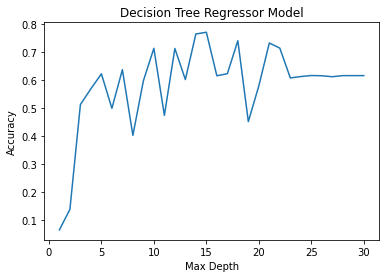

--- Total Time = 4.746228218078613 seconds ---


In [203]:
import time
from sklearn import tree
from sklearn.model_selection import cross_val_score

# Keeping track of time
start_time = time.time()

# Max Nodes
# for i in range(250, 0, -25):
#     print(i)

# Max Depth
depth_scores = {}
for i in range(30, 0, -1):
    model = tree.DecisionTreeRegressor(random_state=2020, max_depth=i)#, max_leaf_nodes = int(258/8))
    #model = tree.DecisionTreeClassifier(random_state=2020, max_depth=i)#, max_leaf_nodes = int(258/8))
    model = model.fit(X_train, Y_train)

    scores = cross_val_score(model, X, Y, cv=10)
    depth_scores[i] = sum(scores) / len(scores)

    print("depth_scores[{}] = {}".format(i, depth_scores[i]))
    
depth_scores_sorted = sorted(depth_scores.items()) # sorted by key, return a list of tuples

depth, score = zip(*depth_scores_sorted) # unpack a list of pairs into two tuples

plt.plot(depth, score)
plt.ylabel("Accuracy")
plt.xlabel("Max Depth")
plt.title("Decision Tree Regressor Model")
plt.savefig("../Images/DecisionTreeRegressor_Line_Avg-CV-10-Score_vs_Depth.png")
plt.show()
    
print("--- Total Time = %s seconds ---" % (time.time() - start_time))

# Plotting CV score over Max Depth con't

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[30] = 0.9113859832635984


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[29] = 0.9092974198047422


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[28] = 0.9063702928870294


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[27] = 0.9013563458856344


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[26] = 0.8963406555090655


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[25] = 0.8921617852161784


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[24] = 0.8850557880055788


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[23] = 0.8762778940027893


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[22] = 0.8687552301255229


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[21] = 0.855800209205021


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[20] = 0.8399180613668061
depth_scores[19] = 0.8169334030683404

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"



depth_scores[18] = 0.7918532078103208
depth_scores[17] = 0.7542416317991633


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[16] = 0.7212343096234309
depth_scores[15] = 0.6865516039051605


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[14] = 0.646018131101813
depth_scores[13] = 0.5921182008368201


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[12] = 0.5403120641562064


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[11] = 0.48891213389121335


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[10] = 0.4471182008368201


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[9] = 0.40700313807531385
depth_scores[8] = 0.37817642956764297


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[7] = 0.35101638772663873
depth_scores[6] = 0.3221861924686193


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[5] = 0.2849930264993027
depth_scores[4] = 0.24613319386331942


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[3] = 0.18052475592747558
depth_scores[2] = 0.11951534170153418


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


depth_scores[1] = 0.07772663877266388


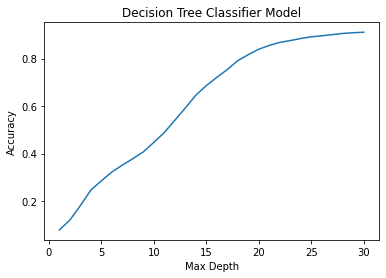

--- Total Time = 7.005065202713013 seconds ---


In [204]:
import time
from sklearn import tree
from sklearn.model_selection import cross_val_score

# Keeping track of time
start_time = time.time()

# Max Depth
depth_scores = {}
for i in range(30, 0, -1):
    model = tree.DecisionTreeClassifier(random_state=2020, max_depth=i)#, max_leaf_nodes = int(258/8))
    model = model.fit(X_train, Y_train)

    scores = cross_val_score(model, X, Y, cv=10)
    depth_scores[i] = sum(scores) / len(scores)

    print("depth_scores[{}] = {}".format(i, depth_scores[i]))
    
depth_scores_sorted = sorted(depth_scores.items()) # sorted by key, return a list of tuples

depth, score = zip(*depth_scores_sorted) # unpack a list of pairs into two tuples

plt.plot(depth, score)
plt.ylabel("Accuracy")
plt.xlabel("Max Depth")
plt.title("Decision Tree Classifier Model")
plt.savefig("../Images/DecisionTreeClassifier_Line_Avg-CV-10-Score_vs_Depth.png")
plt.show()    

print("--- Total Time = %s seconds ---" % (time.time() - start_time))

# Plot DecisionTreeRegressor

Score (Unseen Data)	 0.8202205859084575
Depth			 26
Num leaves		 271
CV=5 scores		 [ 0.95254725  0.94775939  0.95680295  0.67626576 -0.42960235  0.81461673
  0.25202854  0.86974545  0.95751038  0.15652332]
Avg			 0.6154197416807113


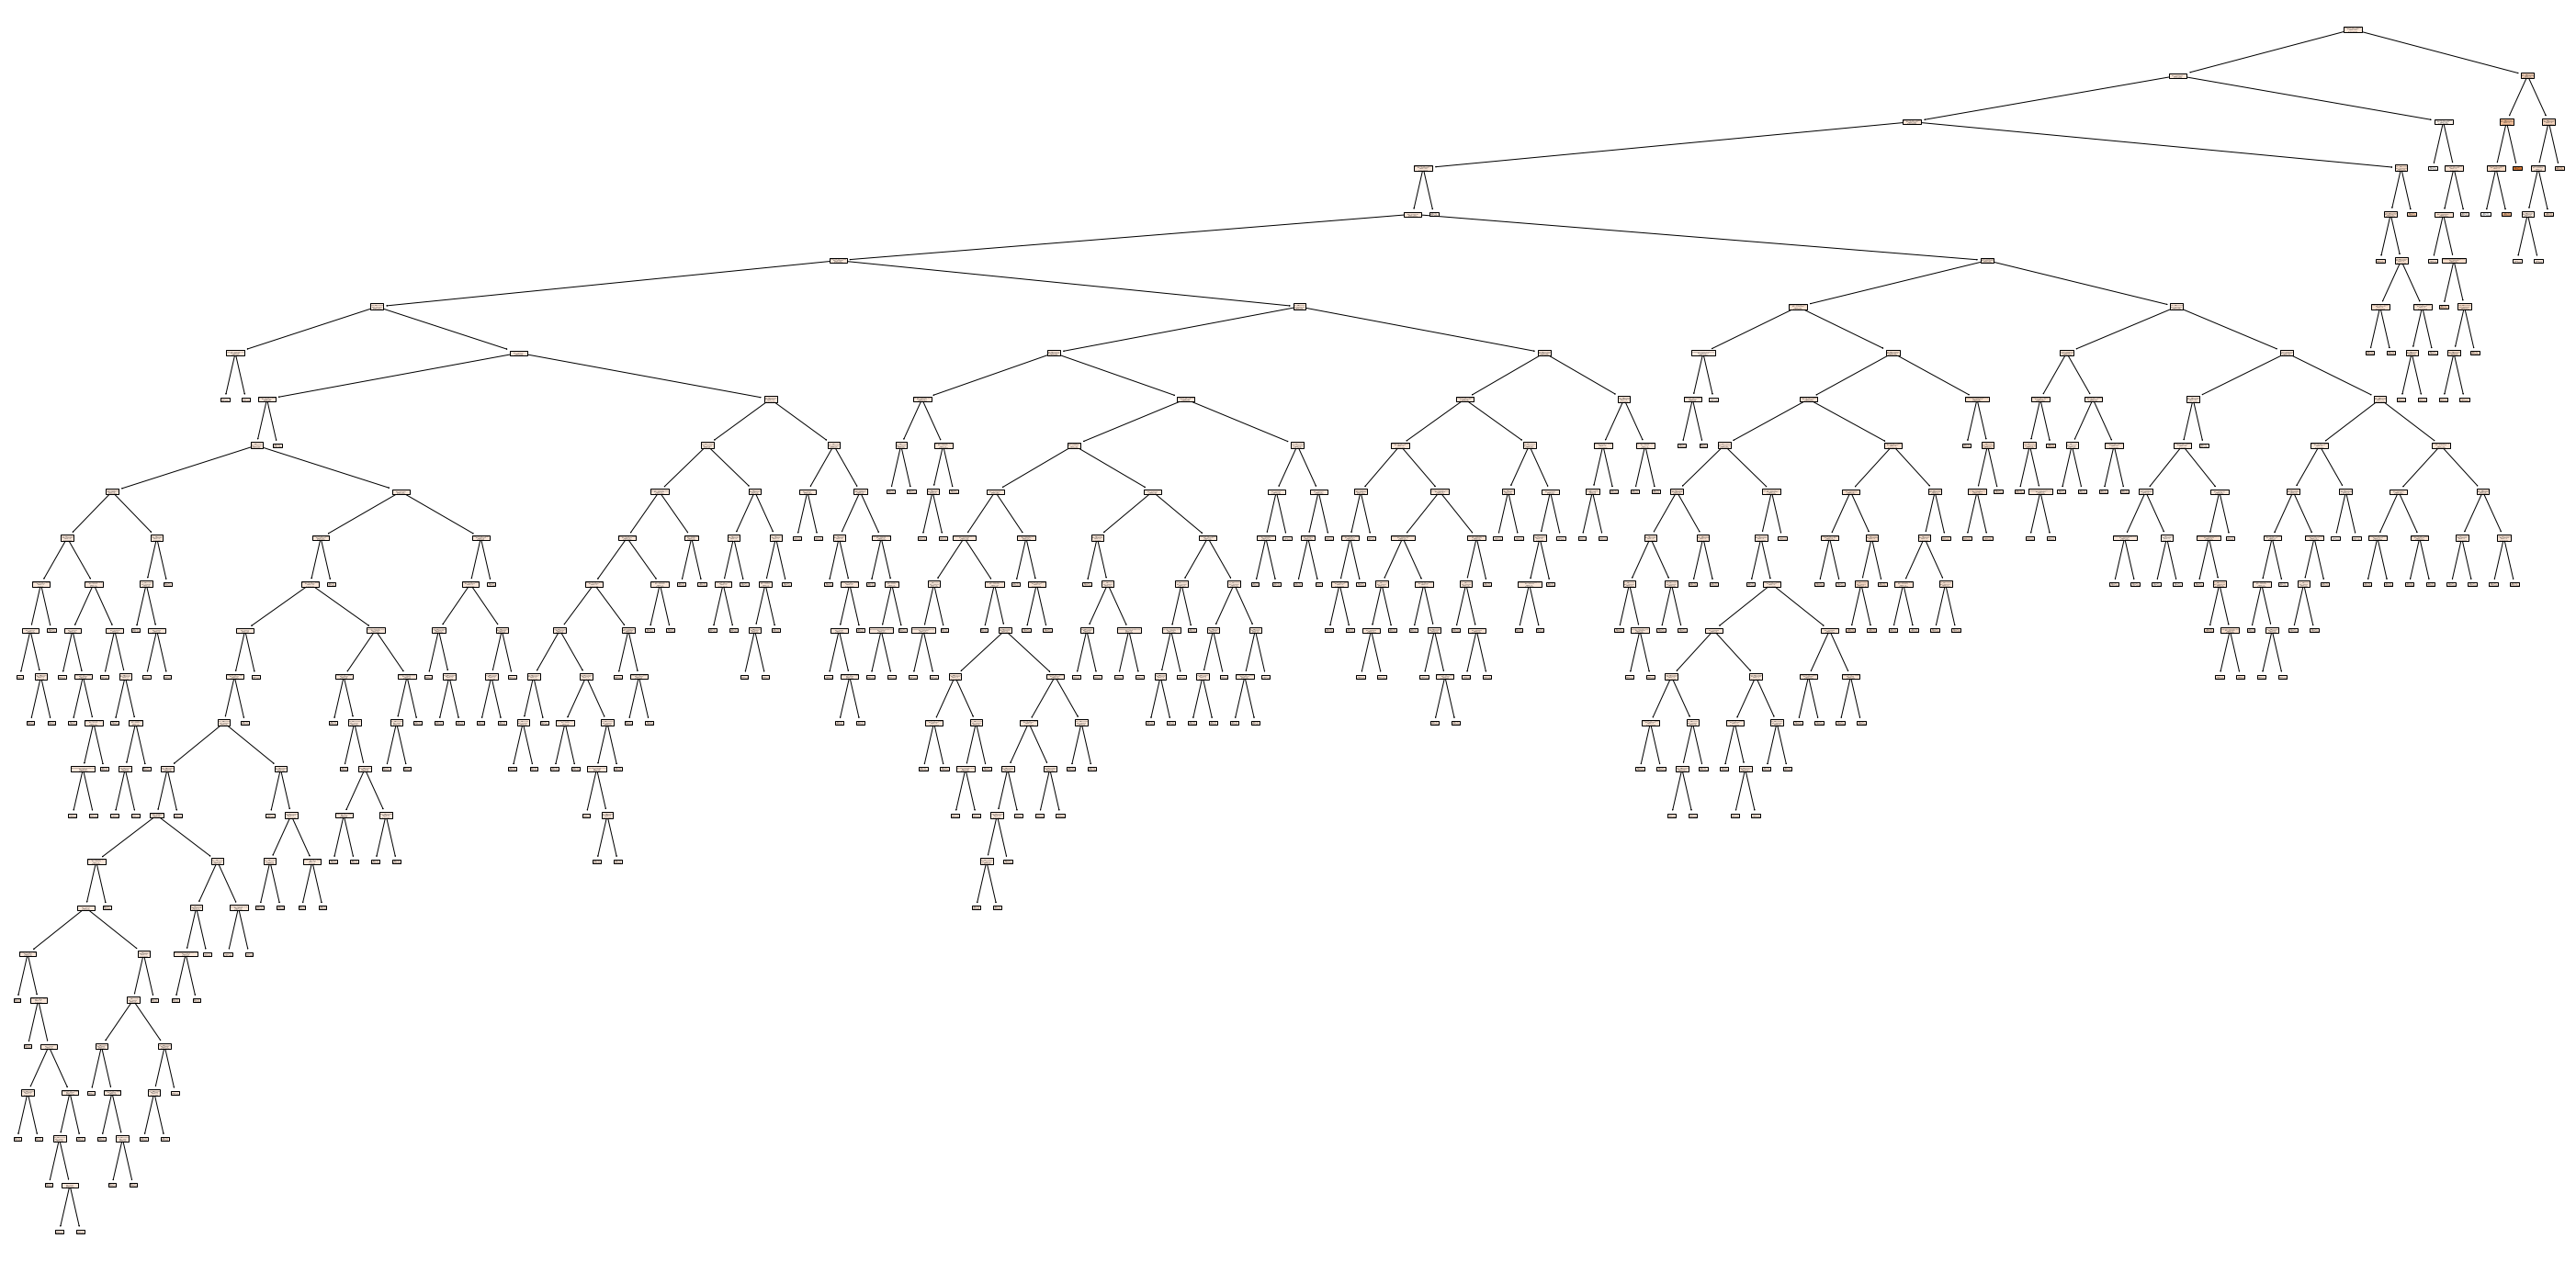

--- Graph Creation = 34.42476797103882 seconds ---
--- Total Time = 34.65946984291077 seconds ---


In [211]:
t_start_time = time.time()

model = tree.DecisionTreeRegressor(random_state=2020)#, max_leaf_nodes = len(X.columns))
model = model.fit(X_train, Y_train)
print("Score (Unseen Data)\t", model.score(X_test, Y_test))
print("Depth\t\t\t", model.get_depth())
print("Num leaves\t\t", model.get_n_leaves())
scores = cross_val_score(model, X, Y, cv=10)
print("CV=5 scores\t\t", scores)
print("Avg\t\t\t", sum(scores) / len(scores))

g_start_time = time.time()

fig = plt.figure(figsize= (50, 25))
tree.plot_tree(model,
                   feature_names= X.columns,
                   filled=True)
plt.savefig("../Images/DecisionTreeRegressor_Tree_Plot_Depth_{}.png".format(model.get_depth()))
plt.show()

print("--- Graph Creation = %s seconds ---" % (time.time() - g_start_time))
print("--- Total Time = %s seconds ---" % (time.time() - t_start_time))

# display(X)

# Plot DecisionTreeClassifier

Score (Unseen Data)	 0.9039665970772442
Depth			 34
Num leaves		 273


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


CV=5 scores		 [0.925      0.94166667 0.92083333 0.90376569 0.88284519 0.92468619
 0.89121339 0.89121339 0.92050209 0.94142259]
Avg			 0.9143148535564855


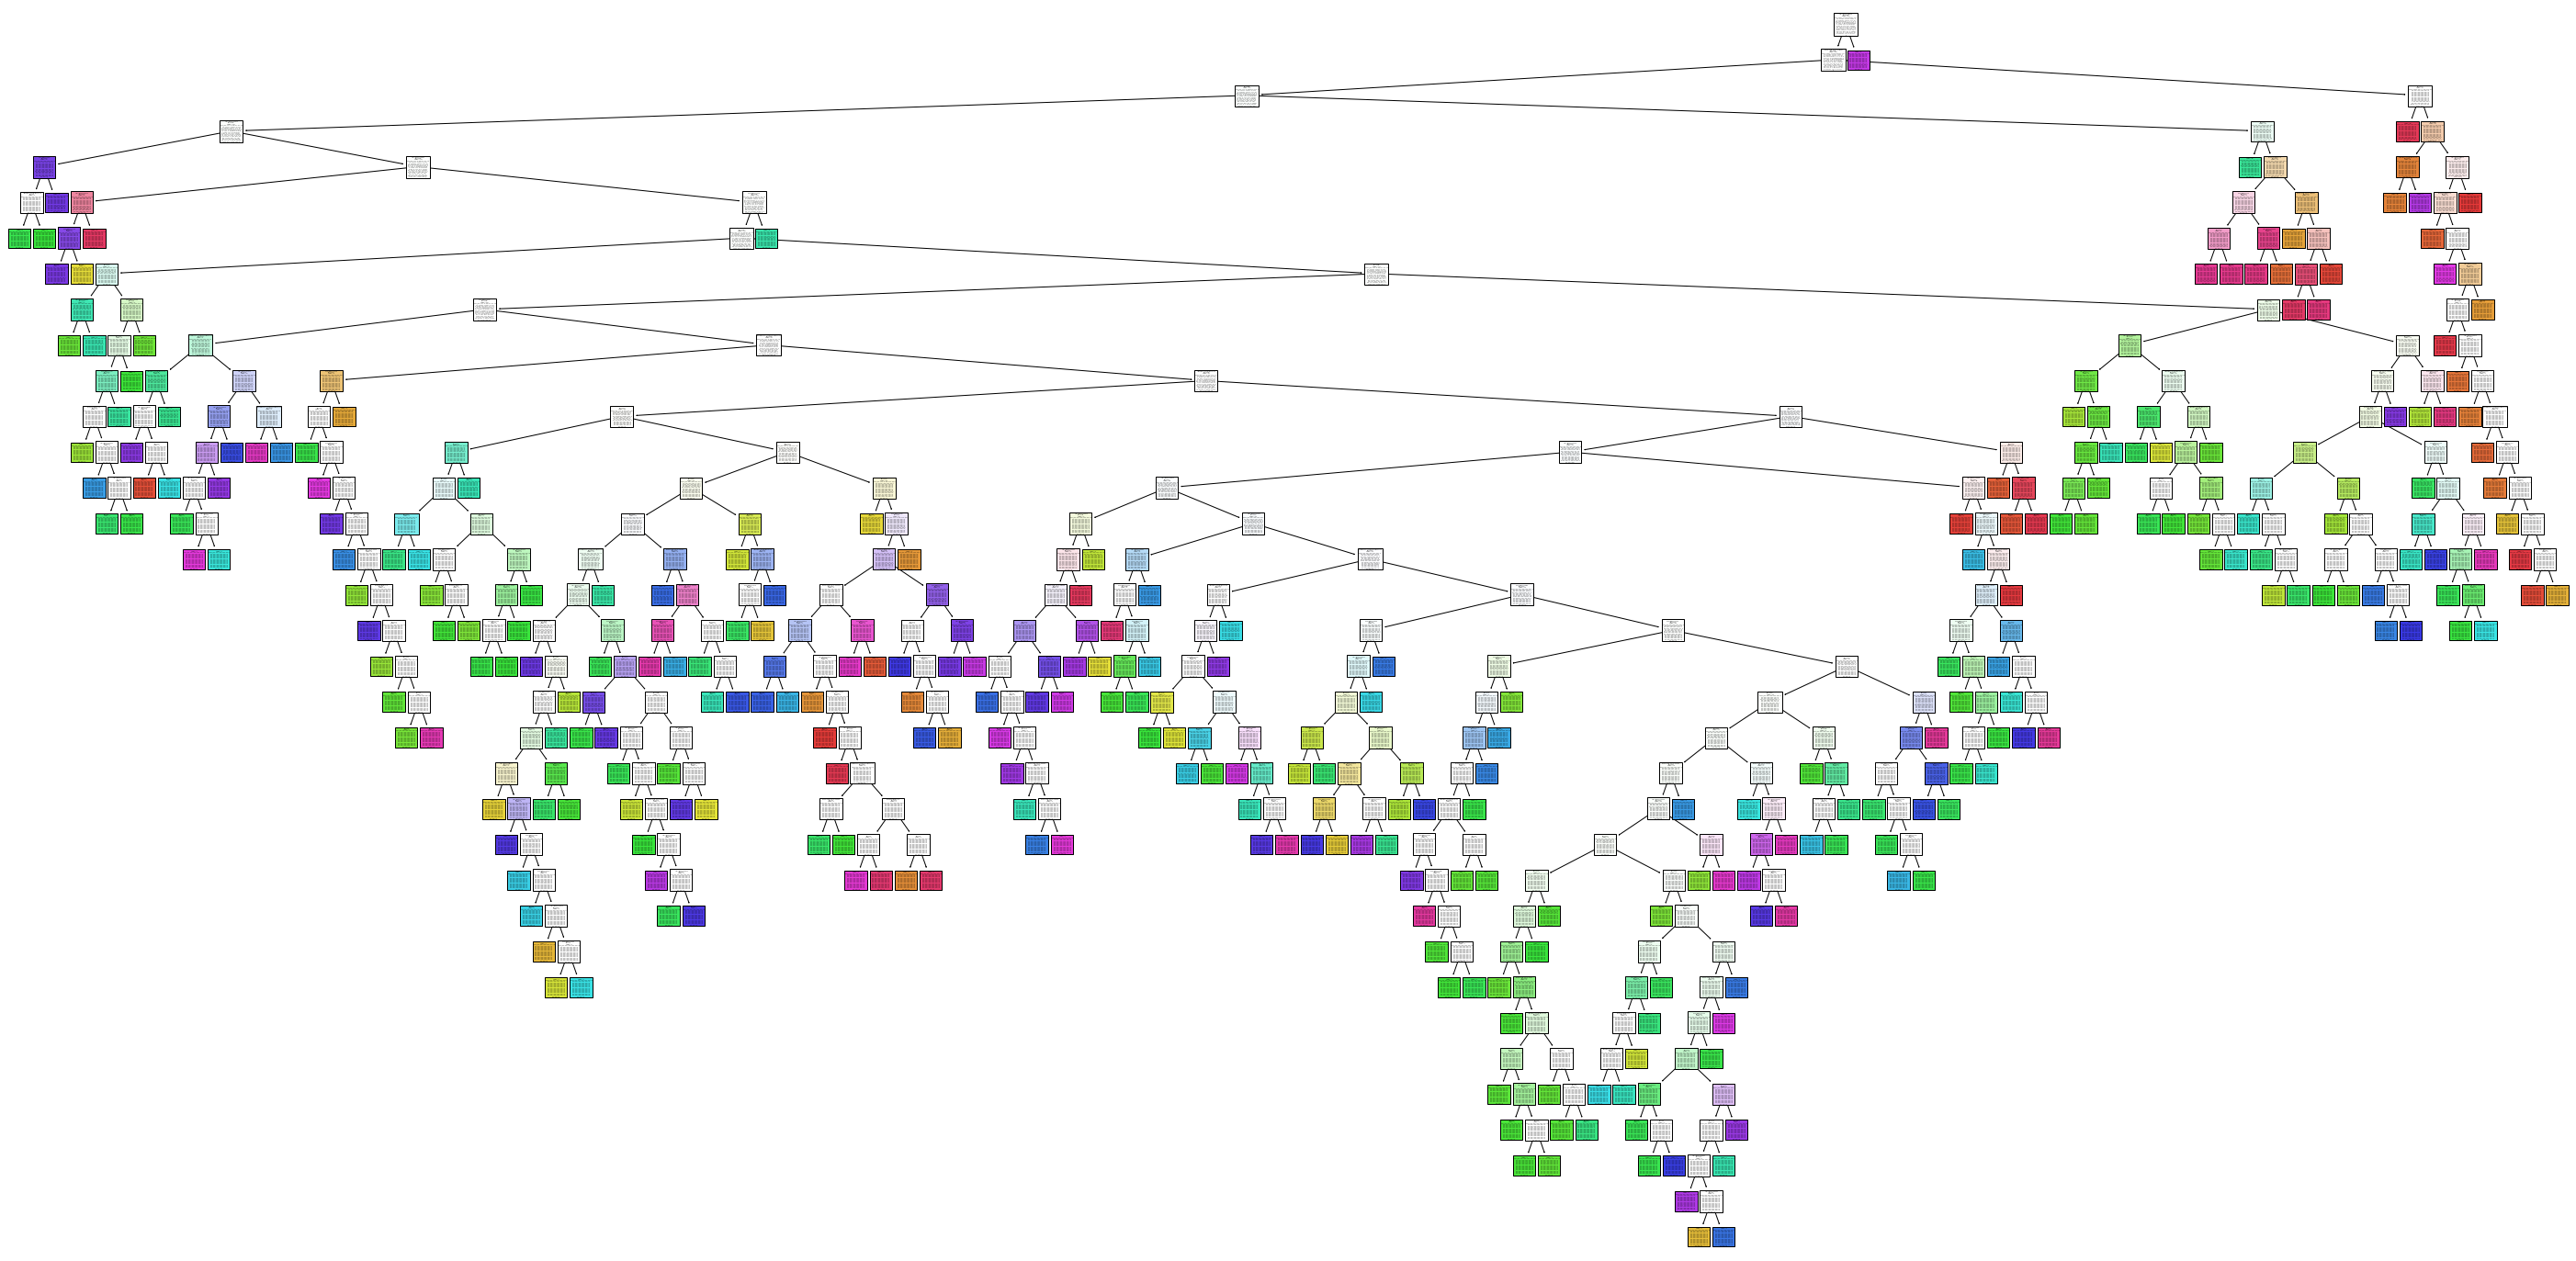

--- Graph Creation = 154.2224931716919 seconds ---
--- Total Time = 154.62976574897766 seconds ---


In [212]:
t_start_time = time.time()

# model = tree.DecisionTreeRegressor(random_state=2020)#, max_leaf_nodes = int(258/8))
model = tree.DecisionTreeClassifier(random_state=2020)#, max_leaf_nodes = 2*len(X.columns))
model = model.fit(X_train, Y_train)
print("Score (Unseen Data)\t", model.score(X_test, Y_test))
print("Depth\t\t\t", model.get_depth())
print("Num leaves\t\t", model.get_n_leaves())
scores = cross_val_score(model, X, Y, cv=10)
print("CV=5 scores\t\t", scores)
print("Avg\t\t\t", sum(scores) / len(scores))

g_start_time = time.time()

fig = plt.figure(figsize= (50, 25))
tree.plot_tree(model,
                   feature_names= X.columns,
                   filled=True)
plt.savefig("../Images/DecisionTreeClassifier_Tree_Plot_Depth_{}.png".format(model.get_depth()))
plt.show()

print("--- Graph Creation = %s seconds ---" % (time.time() - g_start_time))
print("--- Total Time = %s seconds ---" % (time.time() - t_start_time))

# display(X)

# Lets try to change target variable to Job_Outlook_2019-29_Discription

Score (Unseen Data)	 0.8580375782881002
Depth			 10
Num leaves		 12
CV=5 scores		 [0.85416667 0.85       0.825      0.80753138 0.84100418 0.84100418
 0.85355649 0.82426778 0.85355649 0.87029289]
Avg CV score	 0.8420380055788005


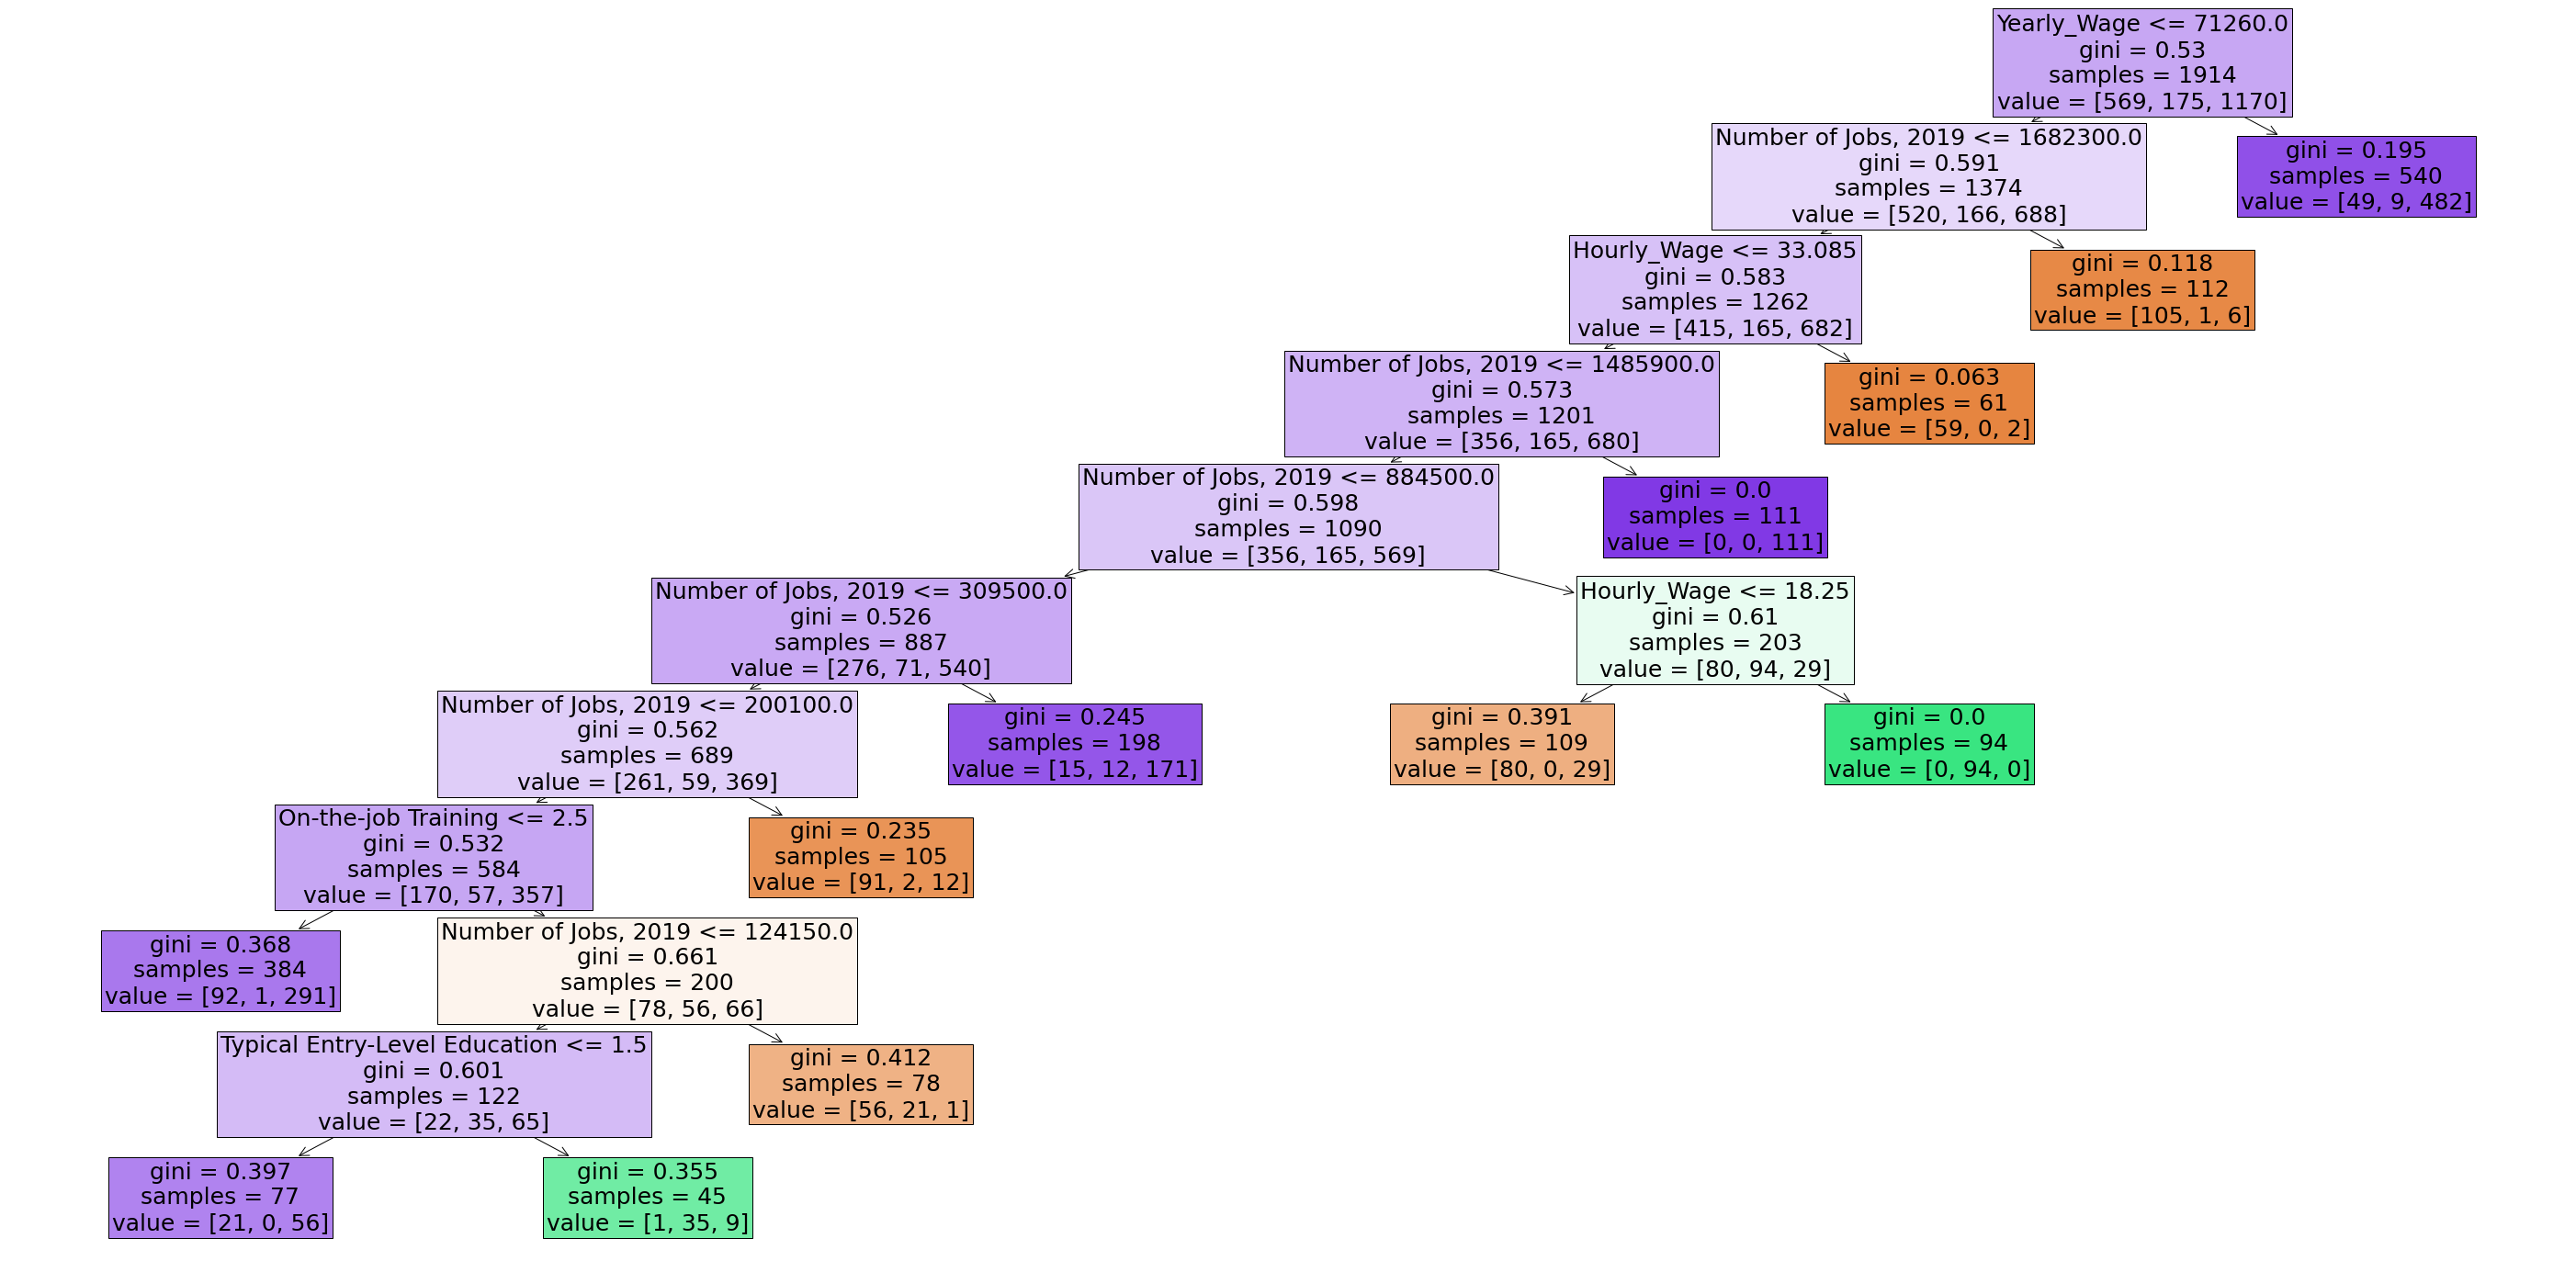

<Figure size 4320x2160 with 0 Axes>

--- Graph Creation = 1.0310721397399902 seconds ---
--- Total Time = 1.2095739841461182 seconds ---


,Typical Entry-Level Education,Work Experience in a Related Occupation,On-the-job Training,"Number of Jobs, 2019",Yearly_Wage,Hourly_Wage
0,2,2,4,51900,48760.0,23.44
1,5,3,0,165200,116720.0,56.11
2,1,3,0,952300,71160.0,34.21
3,7,1,0,190500,95410.0,45.87
4,2,2,2,1643900,36000.0,17.31
...,...,...,...,...,...,...
2388,2,2,1,1465800,35390.0,17.01
2389,1,2,1,1343400,40540.0,19.49
2390,1,2,3,1883700,33710.0,16.21
2391,2,2,1,302100,46500.0,22.35


In [156]:
target = "Job_Outlook_2019-29_Discription"
Y = pd.DataFrame(df[target])

"""
job_outlook_list = [' Decline', ' Slower than average', ' Little or no change', 
                    ' As fast as average', ' Faster than average', ' Much faster than average']
"""

# Redefining target so that is num 
Y.loc[Y["Job_Outlook_2019-29_Discription"]==' Decline', "Job_Outlook_2019-29_Discription"] = -1
Y.loc[Y["Job_Outlook_2019-29_Discription"]==' Slower than average', "Job_Outlook_2019-29_Discription"] = -1
Y.loc[Y["Job_Outlook_2019-29_Discription"]==' Little or no change', "Job_Outlook_2019-29_Discription"] = 0
Y.loc[Y["Job_Outlook_2019-29_Discription"]==' As fast as average', "Job_Outlook_2019-29_Discription"] = 1
Y.loc[Y["Job_Outlook_2019-29_Discription"]==' Faster than average', "Job_Outlook_2019-29_Discription"] = 1
Y.loc[Y["Job_Outlook_2019-29_Discription"]==' Much faster than average', "Job_Outlook_2019-29_Discription"] = 1

Y["Job_Outlook_2019-29_Discription"] = Y["Job_Outlook_2019-29_Discription"].astype(int)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=2020)

t_start_time = time.time()

model = tree.DecisionTreeClassifier(random_state=2020, max_leaf_nodes=12)#6, max_leaf_nodes = int(258/8))
model = model.fit(X_train, Y_train)
print("Score (Unseen Data)\t", model.score(X_test, Y_test))
print("Depth\t\t\t", model.get_depth())
print("Num leaves\t\t", model.get_n_leaves())
scores = cross_val_score(model, X, Y, cv=10)
print("CV=5 scores\t\t", scores)
print("Avg CV score\t", sum(scores) / len(scores))

g_start_time = time.time()


plt.figure(figsize=(50,25))
tree.plot_tree(model,
               feature_names= X.columns,
               filled=True,
               fontsize=25)
plt.figure(figsize=(60,30))
plt.show()

print("--- Graph Creation = %s seconds ---" % (time.time() - g_start_time))
print("--- Total Time = %s seconds ---" % (time.time() - t_start_time))

display(X)

Score (Unseen Data)	 0.9561586638830898
depth_scores[30] = 0.9611375149132586
Score (Unseen Data)	 0.9561586638830898
depth_scores[29] = 0.9611375149132586
Score (Unseen Data)	 0.9561586638830898
depth_scores[28] = 0.9611375149132586
Score (Unseen Data)	 0.9561586638830898
depth_scores[27] = 0.9611375149132586
Score (Unseen Data)	 0.9561586638830898
depth_scores[26] = 0.9611375149132586
Score (Unseen Data)	 0.9561586638830898
depth_scores[25] = 0.9611375149132586
Score (Unseen Data)	 0.9561586638830898
depth_scores[24] = 0.9611375149132586
Score (Unseen Data)	 0.9561586638830898
depth_scores[23] = 0.9611375149132586
Score (Unseen Data)	 0.9561586638830898
depth_scores[22] = 0.9611375149132586
Score (Unseen Data)	 0.9561586638830898
depth_scores[21] = 0.9611375149132586
Score (Unseen Data)	 0.9561586638830898
depth_scores[20] = 0.9611375149132586
Score (Unseen Data)	 0.9561586638830898
depth_scores[19] = 0.9611375149132586
Score (Unseen Data)	 0.9561586638830898
depth_scores[18] = 0.961

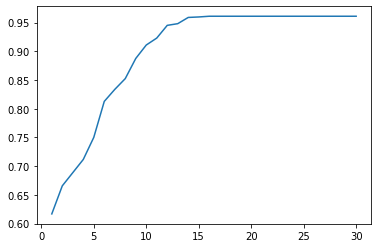

--- Total Time = 1.2608342170715332 seconds ---


In [160]:
start_time = time.time()

# Max Nodes
# for i in range(250, 0, -25):
#     print(i)

# Max Depth
depth_scores = {}
for i in range(30, 0, -1):
    model = tree.DecisionTreeClassifier(random_state=2020, max_depth=i)#, max_leaf_nodes = int(258/8))
    model = model.fit(X_train, Y_train)

    scores = cross_val_score(model, X, Y, cv=2)
    
    print("Score (Unseen Data)\t", model.score(X_test, Y_test))
    depth_scores[i] = sum(scores) / len(scores)

    print("depth_scores[{}] = {}".format(i, depth_scores[i]))

    # g_start_time = time.time()

    # fig = plt.figure()#figsize= (15, 5))
    # tree.plot_tree(model,
    #                    feature_names= X.columns,
    #                    filled=True)
    # plt.show()


    # print("--- Graph Creation = %s seconds ---" % (time.time() - g_start_time))
    
depth_scores_sorted = sorted(depth_scores.items()) # sorted by key, return a list of tuples

depth, score = zip(*depth_scores_sorted) # unpack a list of pairs into two tuples

plt.plot(depth, score)
plt.show()
    
print("--- Total Time = %s seconds ---" % (time.time() - start_time))